In [7]:
#!pip install wordcloud
import pandas as pd
import numpy as np
import tweepy
import re
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import textblob
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
access_token='277096430-VaZfIqjPFJ3cbRxNlWgnD7IBMSklCY8UEmWqMeHZ'
access_token_secret='dTUgaMwTC7me96slf0aIr6DtKmknHDcgHlTrU7coa4rkx'
consumer_key='QmGhW53Sn8Ss7vsegJkDgEVMP'
consumer_secret='xeaYI1i9vJUAsBJcZ8luNZQHBllCTQ46nXATTymMJu36cN4RH5'

In [9]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [10]:
keyword='#BiggBossTelugu4'
date_since='2020-09-01'
data=tweepy.Cursor(api.search,q=keyword,lang='en',tweet_mode='extended',since=date_since).items(100)

# i=1
# for tweet in data:
#     print(str(i)+') '+tweet.full_text+'\n')
#     i+=1

In [11]:
df=pd.DataFrame([tweet.full_text for tweet in data],columns=['Tweets'])
df.head(100)

,Tweets
0,RT @SaranyaSampathJ: #BiggBossTelugu4 \n\nIn s...
1,RT @shrav4321: This guy has got a heart of gol...
2,RT @Abijeetians: If haters remember #Abijeet t...
3,RT @alekhyaharikaFn: VOTE FOR HARIKA 💖\n\n1. L...
4,A Small Gesture With A Good Heart is Enough To...
...,...
95,#BiggBossTelugu4 If #Akhil shredded ones famil...
96,RT @Kumar76981033: #Ariyana is the bravest gir...
97,#BiggBossTelugu4 \nThis secret room thing was ...
98,RT @shwetha0811: 2 mins silence to all the hat...


In [12]:
df.dtypes

Tweets    object
dtype: object

In [13]:
df1=df
df2=df
df3=df
df4=df

In [14]:
#cleaning the text data

#create a function to clean the data

def Cleanthedata(text):
    text=re.sub(r'@[A-Z0-9a-z]+','',text) #removing @ data
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'#','',text) #removing the # symbol
    #text=re.sub(r'(\n\n|?|%|\")','',text) #removes all the line breaks and new lines
    text=re.sub(r'RT[\s|\W]','',text)
    text=re.sub(r'RT @([^a-zA-Z0-9]|\s)_([^a-zA-Z0-9]|\s):+','',text) #removing the retweets
    text=re.sub(r"\W+|_", " ", text)
    text=re.sub(r'RT :','',text)
    text=re.sub(r'RT_[^a-z,A-Z0-9]:+','',text) #removing the RT_ tags
    text=re.sub(r'RT _[^a-zA-Z0-9]:+','',text) #removing the RT _ tags
     #removing the hyper link
    text=re.sub(r'/\B#\w*[a-zA-Z]+\w*/','',text)
    
    return text
    

In [15]:
#---/(\r\n|\n\n|\n|\r)/gm
df['Tweets']=df['Tweets'].apply(Cleanthedata)

In [16]:
df

,Tweets
0,BiggBossTelugu4 In secret room gulabi govind ...
1,This guy has got a heart of gold Be it giving...
2,If haters remember Abijeet told that he likes...
3,VOTE FOR HARIKA 1 Login to Disney Hotstar App...
4,A Small Gesture With A Good Heart is Enough To...
...,...
95,BiggBossTelugu4 If Akhil shredded ones family ...
96,Ariyana is the bravest girl I ve ever seen Sh...
97,BiggBossTelugu4 This secret room thing was big...
98,2 mins silence to all the haters who trolled ...


In [17]:
##-----/\B#\w*[a-zA-Z]+\w*/


In [18]:
# create a function to Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

In [20]:
df.head()

,Tweets,Subjectivity,Polarity
0,BiggBossTelugu4 In secret room gulabi govind ...,0.750000,-0.400000
1,This guy has got a heart of gold Be it giving...,0.000000,0.000000
2,If haters remember Abijeet told that he likes...,0.750000,0.000000
3,VOTE FOR HARIKA 1 Login to Disney Hotstar App...,0.000000,0.000000
4,A Small Gesture With A Good Heart is Enough To...,0.566667,0.333333


<function matplotlib.pyplot.show(*args, **kw)>

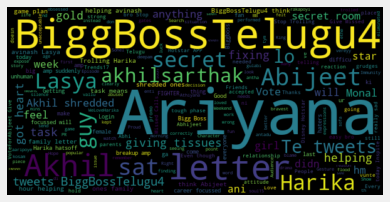

In [21]:
#plotting the wordcloud
allWords=' '.join(twts for twts in df['Tweets'])
wordCloud=WordCloud(width=600,height=300,random_state=21,max_font_size=100).generate(allWords)

#plotting
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show

In [22]:
# defining Analysis function

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    

In [23]:
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [24]:
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,BiggBossTelugu4 In secret room gulabi govind ...,0.750000,-0.400000,Negative
1,This guy has got a heart of gold Be it giving...,0.000000,0.000000,Neutral
2,If haters remember Abijeet told that he likes...,0.750000,0.000000,Neutral
3,VOTE FOR HARIKA 1 Login to Disney Hotstar App...,0.000000,0.000000,Neutral
4,A Small Gesture With A Good Heart is Enough To...,0.566667,0.333333,Positive


In [25]:
#printing all the positive tweets
j=1

sortedDF=df.sort_values(by=['Polarity'])

for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j+=1

1) A Small Gesture With A Good Heart is Enough To Show How Beautiful His Character is Sometimes The Very Smallest Things By Him also Shows What He is That s Why We Love You King Is Always A King Irrespective Of Anything Abijeet BiggBossTelugu4 

2)  Abijeet clearly saying that Strong contestant like Akhil shouldn t leave the house instead we should have selected who i 

3)  Te tweets BiggBossTelugu4 Harika hatsoff to u Getting out of the breakup amp suddenly being career focussed will be very difficu 

4) Abhi thana hypocrisy ni thane expose cheskuntunnadu Tasks aadadu Immunity akkarledhu Blind fans votes vestharani over confidence Experience kosam vacchanu win avvataniki kaadhu antadu Bayataki vellipotha still you should respect my decision antadu Loser words BiggBossTelugu4

5)  Te tweets BiggBossTelugu4 I think Abijeet sat for more than an hour helping Ariyana And Harika helping avinash Lasya also 

6)  And we are too Proud of you harika WeLoveHarika biggbosstelugu4

7)  That attitu

In [26]:
#printing all negarive tweets

j=1

for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j+=1

1)  BiggBossTelugu4 In secret room gulabi govind reaction chusthe chala irritating ga undhi Asalu enti ah reaction 

2)  Having Friends and being a girl myself telling about your relationship to parents is not easy bro Stop Trolling Harika o 

3)  week ARIYANA completely misunderstood topic of sharing big secret in her life Even though it is a serious issue instead of sha 

4)  Akhil felt Ariyana s secret was not a secret accepted But how did he feel Monal s was a big secret its unacceptable 

5) Akhil felt Ariyana s secret was not a secret accepted But how did he feel Monal s was a big secret its unacceptable Akhil place lo Ariyana undi ila chesunte ippatki Ariyana ni Athiyana selfish attitude ani tags character define chesestunde haters biggbosstelugu4

6) This guy has got a heart of gold Be it giving tissues to Lasya or While helping in fixing the letter of Ariyana He sat for sooo long setting each and every piece of that letter and that was really so not easy even lasya helped him 

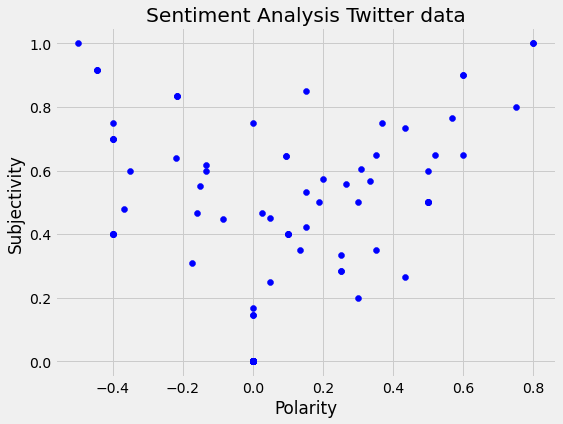

In [27]:
#plotting polarity and subjectivity
plt.figure(figsize=(8,6))

for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis Twitter data')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [28]:
#Getting the positive counts 
pt=df[df.Analysis=='Positive']
pt=pt['Tweets']


print('Positive Percentage:{}%'.format(round((pt.shape[0]/df.shape[0]*100),1)))

Positive Percentage:42.0%


In [29]:
#Getting the negative counts 
nt=df[df.Analysis=='Negative']
nt=nt['Tweets']


print('Negative Percentage:{}%'.format(round((nt.shape[0]/df.shape[0]*100),1)))

Negative Percentage:25.0%


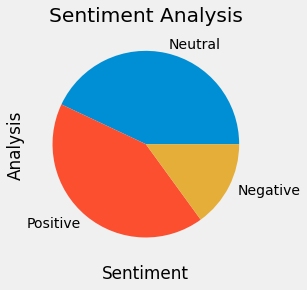

In [226]:
#showing the value counts

df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')